# import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read file

In [3]:
all_df = pd.read_csv('C:/Users/caban/Desktop/data_science/Naver_Data_Competition_2018/project/all_df.csv')

In [4]:
y_df = pd.read_csv('C:/Users/caban/Desktop/data_science/Naver_Data_Competition_2018/project/all_y.csv')

In [5]:
all_df.head()

,Unnamed: 0,Duration,Credit amount,Installment rate,Present residence since,Age in years,Number of existing credits,Number of people maintenance,account_minus,account_none,...,employed_4_7,personal_status_single,sex_female,guarantors_none,property_real_estate,installment_plans_none,housing_own,job_skilled_employees,telephone_registered,foreign_worker
0,0,6,1169,4,4,67,2,1,1,0,...,1,1,0,1,1,1,1,1,1,1
1,1,48,5951,2,2,22,1,1,0,0,...,0,0,1,1,1,1,1,1,0,1
2,2,12,2096,2,3,49,1,2,0,1,...,1,1,0,1,1,1,1,0,0,1
3,3,42,7882,2,4,45,1,2,1,0,...,1,1,0,0,0,1,0,1,0,1
4,4,24,4870,3,4,53,2,2,1,0,...,0,1,0,1,0,1,0,1,0,1


In [6]:
all_df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
all_df.head()

,Duration,Credit amount,Installment rate,Present residence since,Age in years,Number of existing credits,Number of people maintenance,account_minus,account_none,credit_critical_account,...,employed_4_7,personal_status_single,sex_female,guarantors_none,property_real_estate,installment_plans_none,housing_own,job_skilled_employees,telephone_registered,foreign_worker
0,6,1169,4,4,67,2,1,1,0,1,...,1,1,0,1,1,1,1,1,1,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,1,1,1,1,1,0,1
2,12,2096,2,3,49,1,2,0,1,1,...,1,1,0,1,1,1,1,0,0,1
3,42,7882,2,4,45,1,2,1,0,0,...,1,1,0,0,0,1,0,1,0,1
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,1,0,1,0,1,0,1


In [8]:
continuous_df = all_df[['Duration', 'Credit amount', 'Age in years']]

In [9]:
continuous_df.head()

,Duration,Credit amount,Age in years
0,6,1169,67
1,48,5951,22
2,12,2096,49
3,42,7882,45
4,24,4870,53


# continuous variables 끼리 다중공선성 체크

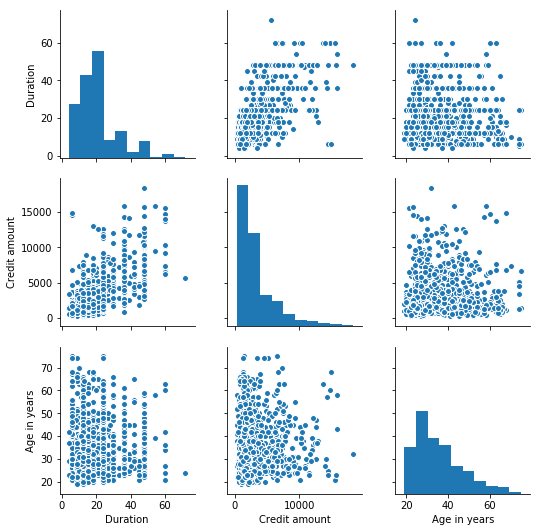

In [10]:
sns.pairplot(continuous_df)

In [11]:
corr_continuous = continuous_df.corr(method='pearson')

In [12]:
corr_continuous

,Duration,Credit amount,Age in years
Duration,1.000000,0.624984,-0.036136
Credit amount,0.624984,1.000000,0.032716
Age in years,-0.036136,0.032716,1.000000


In [13]:
vif_duration_credit =  1 / (1 - ((corr_continuous['Duration'][1])**2))

In [14]:
vif_duration_credit

1.6409724516410598

In [15]:
all_df.drop(['Present residence since', 'Number of existing credits', 'Number of people maintenance'], inplace=True, axis=1)

In [16]:
all_df.drop('Installment rate ', axis=1, inplace=True)

In [17]:
all_df.drop(['Duration', 'Credit amount', 'Age in years'], axis=1, inplace=True)

In [18]:
all_df.head()

,account_minus,account_none,credit_critical_account,credit_paid,purpose_cars,purpose_domestic,savings_below_100,savings_100_1000,employed_1_4,employed_4_7,personal_status_single,sex_female,guarantors_none,property_real_estate,installment_plans_none,housing_own,job_skilled_employees,telephone_registered,foreign_worker
0,1,0,1,0,0,1,0,0,0,1,1,0,1,1,1,1,1,1,1
1,0,0,0,1,0,1,1,0,1,0,0,1,1,1,1,1,1,0,1
2,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1
3,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,1
4,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


In [19]:
dummy_df = all_df

In [20]:
del all_df

In [21]:
size = (continuous_df['Credit amount'].max() - continuous_df['Credit amount'].min())

In [22]:
continuous_df['Credit amount_rate'] = (continuous_df['Credit amount'] - continuous_df['Credit amount'].mean()) / size

C:\Users\caban\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
continuous_df.head()

,Duration,Credit amount,Age in years,Credit amount_rate
0,6,1169,67,-0.115674
1,48,5951,22,0.147449
2,12,2096,49,-0.064667
3,42,7882,45,0.253700
4,24,4870,53,0.087969


In [24]:
continuous_df['Credit amount_log'] = np.log(continuous_df['Credit amount'])

C:\Users\caban\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
continuous_df.drop('Credit amount_rate', axis=1, inplace=True)

C:\Users\caban\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
continuous_df.head()

,Duration,Credit amount,Age in years,Credit amount_log
0,6,1169,67,7.063904
1,48,5951,22,8.691315
2,12,2096,49,7.647786
3,42,7882,45,8.972337
4,24,4870,53,8.490849


In [27]:
continuous_df.drop('Credit amount', axis=1, inplace=True)

C:\Users\caban\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Logistic regression (L1 regularization) + confusion matrix

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [29]:
all_df = continuous_df.join(dummy_df)

In [30]:
train_X, test_X, train_y, test_y = train_test_split(all_df, y_df)

In [176]:
regr = LogisticRegression(fit_intercept = True, penalty = 'l1')

In [178]:
regr.fit(train_X, np.ravel(train_y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [179]:
pred_logistic = regr.predict(test_X)

In [180]:
regr.score(test_X, test_y)

0.74

In [181]:
confusion_matrix(test_y, pred_logistic)

array([[ 36,  41],
       [ 24, 149]], dtype=int64)

# decision tree + confusion matrix

In [38]:
from sklearn import tree

In [172]:
german_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
german_tree.fit(train_X, np.ravel(train_y))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [173]:
pred_tree = german_tree.predict(test_X)

In [174]:
german_tree.score(test_X, np.ravel(test_y))

0.724

In [175]:
german_tree.feature_importances_

array([0.14989026, 0.041445  , 0.20288899, 0.        , 0.29797304,
       0.02886146, 0.01845372, 0.        , 0.03536154, 0.        ,
       0.        , 0.        , 0.05395411, 0.02258409, 0.        ,
       0.01800264, 0.03443924, 0.05483504, 0.        , 0.02355535,
       0.01775552, 0.        ])

In [165]:
confusion_matrix(test_y, pred_tree)

array([[ 37,  40],
       [ 29, 144]], dtype=int64)

# random forest + confusion matrix

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
german_forest = RandomForestClassifier(criterion = 'entropy', max_depth=4)

In [183]:
german_forest.fit(train_X, np.ravel(train_y))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [184]:
pred_forest = german_forest.predict(test_X)

In [185]:
german_forest.score(test_X, test_y)

0.74

In [186]:
german_forest.feature_importances_

array([0.12366287, 0.06076285, 0.08513255, 0.10224864, 0.24087441,
       0.06027646, 0.03195285, 0.00105604, 0.        , 0.02512195,
       0.013556  , 0.02039218, 0.02468103, 0.03156365, 0.00991336,
       0.01694135, 0.01116614, 0.05494242, 0.06092784, 0.0004535 ,
       0.01910661, 0.00526733])

In [187]:
confusion_matrix(test_y, pred_forest)

array([[ 19,  58],
       [  7, 166]], dtype=int64)